In [1]:
%matplotlib inline

from pathlib import Path

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

from sklearn.feature_extraction import _stop_words

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize          
from nltk.stem.snowball import EnglishStemmer 
import matplotlib.pylab as plt
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajm10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# 20.1 토큰화

토큰화 : 텍스트를 입력받아 자동화된 방식으로 분리된 "토큰" 또는 용어로 나누는 과정


Thanks John!<br /><br /><font size=”3”>
&quot;Illustrations and demos will be
provided for students to work through on
their own&quot;</font>.
Do we need that to finish project? If yes,
where to find the illustration and demos?
Thanks for your help.\<img title=”smile”
alt=”smile” src=”\url{http://lms.statistics.
com/pix/smartpix.php/statistics_com_1/s/smil
ey.gif}” \><br /> <br />

## a

In [11]:
# 10개의 비단어 토큰 규정

# <br /><br /><font size=”3”>
# &quot;
# &quot;</font>.
# \<img title=”smile”
# alt=”smile” src=”\url{http://lms.statistics.
# com/pix/smartpix.php/statistics_com_1/s/smil
# ey.gif}” \><br /> <br />

## b

전처리 단계에서 제거해야 하는 불용어 제거

## c

## d

# 20.2 인터넷 논의 포스트의 분류

문서들을 자동차 관련된 것인지 전자제품 관련된 것인지 분류하는 모델 구축하는 작업

## a

In [12]:
# 파일을 불러오고 레이블 배열을 추가적으로 생성
# 자동차는 1 전자제품은 0으로 사용

corpus = []
label = []
with ZipFile('AutoAndElectronics.zip') as rawData:
    for info in rawData.infolist():
        if info.is_dir(): 
            continue
        label.append(1 if 'rec.autos' in info.filename else 0)
        corpus.append(rawData.read(info))

## b

In [13]:
# 첫번째 전처리단계는 토큰화
# 두번째 전처리는 불용어의 제거
# 세번째 전처리는 스테밍 - 여러 가지 형태의 단어를 하나의 어원으로 통합하는 것 

class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

In [14]:
corpus

[b"Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!wupost!uunet!brunix!cs.brown.edu!cs012055\nFrom: cs012055@cs.brown.edu (Hok-Chung Tsang)\nNewsgroups: rec.autos\nSubject: Re: Saturn's Pricing Policy\nMessage-ID: <1993Apr5.230808.581@cs.brown.edu>\nDate: 5 Apr 93 23:08:08 GMT\nArticle-I.D.: cs.1993Apr5.230808.581\nReferences: <C4oxwp.KKM@news.cso.uiuc.edu> <C4vIr5.L3r@shuksan.ds.boeing.com>\nSender: news@cs.brown.edu\nOrganization: Brown Computer Science Dept.\nLines: 51\n\nIn article <C4vIr5.L3r@shuksan.ds.boeing.com>, fredd@shuksan (Fred Dickey) writes:\n|> CarolinaFan@uiuc (cka52397@uxa.cso.uiuc.edu) wrote:\n|> : \tI have been active in defending Saturn lately on the net and would\n|> : like to state my full opinion on the subject, rather than just reply to others'\n|> : points.\n|> : \t\n|> : \tThe biggest problem some people seem to be having is that Saturn\n|> : Dealers make ~$2K on a car.  I think most will agree with me that the car is\n|> : comparably pric

In [15]:
print(preprocessor)

CountVectorizer(encoding='latin1',
                tokenizer=<__main__.LemmaTokenizer object at 0x00000239B11AAA90>)


In [16]:
print(preprocessedText)

  (0, 8620)	1
  (0, 8266)	1
  (0, 13299)	1
  (0, 12634)	1
  (0, 1436)	1
  (0, 12243)	1
  (0, 7982)	1
  (0, 11343)	2
  (0, 10223)	11
  (0, 9148)	8
  (0, 8989)	1
  (0, 2813)	1
  (0, 535)	1
  (0, 4760)	1
  (0, 9630)	1
  (0, 10427)	1
  (0, 7975)	1
  (0, 8364)	1
  (0, 1428)	1
  (0, 2290)	1
  (0, 10304)	1
  (0, 3012)	1
  (0, 6769)	1
  (0, 617)	1
  (0, 4432)	1
  :	:
  (1999, 2965)	2
  (1999, 10538)	1
  (1999, 924)	1
  (1999, 5713)	1
  (1999, 1775)	1
  (1999, 12963)	3
  (1999, 11474)	2
  (1999, 12677)	1
  (1999, 12678)	1
  (1999, 2322)	2
  (1999, 3201)	2
  (1999, 1807)	1
  (1999, 4845)	1
  (1999, 2423)	2
  (1999, 11787)	1
  (1999, 908)	2
  (1999, 88)	2
  (1999, 362)	1
  (1999, 12476)	2
  (1999, 9523)	3
  (1999, 3810)	1
  (1999, 3953)	2
  (1999, 270)	1
  (1999, 8730)	1
  (1999, 10549)	1


#### 스테밍 단계를 수행하지 않으면 어떻게 보여지는가

스테밍 : 단어의 서로 다른 변이를 줄여 공통의 어원을 추출하는 언어학적 방법
    
텍스트 축소를 통해 언어의 양을 줄인다.

corpus를 통해서도 알 수 있듯 수많은 양의 언어가 있음을 확인 가능

처리해야 하는 텍스트 양이 많아진다.

## c

#### LSA - 잠재의미 색인

차원축소 방법으로 텍스트 데이터에 적용 가능

용어를 더 작은 개념으로 축소할 수 있음

In [17]:
# Step 3: TF-IDF and latent semantic analysis
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

# Extract 20 concepts using LSA ()
svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

In [18]:
print(tfidf)

  (0, 13299)	0.029741535638547142
  (0, 13290)	0.03262784370896642
  (0, 13285)	0.01355931954599499
  (0, 12634)	0.019902271263830377
  (0, 12445)	0.05018775365717173
  (0, 12443)	0.03526099158187343
  (0, 12375)	0.04140444820852253
  (0, 12243)	0.05920220993243322
  (0, 12226)	0.06541736974465087
  (0, 12048)	0.03698181391024409
  (0, 11945)	0.020394386020219545
  (0, 11865)	0.02034022535025328
  (0, 11862)	0.043629331982734255
  (0, 11614)	0.032872796577030586
  (0, 11477)	0.047827232579770396
  (0, 11462)	0.024855926563550523
  (0, 11343)	0.01641062341691092
  (0, 11318)	0.04117329738191024
  (0, 11160)	0.026209657439104472
  (0, 10744)	0.05351472125610181
  (0, 10608)	0.061562731009834545
  (0, 10427)	0.013913329071272927
  (0, 10304)	0.0331252876281775
  (0, 10233)	0.0458884907109627
  (0, 10228)	0.21871353136264543
  :	:
  (1999, 2526)	0.0335857596036077
  (1999, 2423)	0.0966607547474954
  (1999, 2420)	0.03369322082792064
  (1999, 2410)	0.045411209936584686
  (1999, 2393)	0.03846

In [19]:
print(lsa_tfidf)

[[ 0.50585807  0.54446105 -0.08202505 ... -0.13009039 -0.15177762
   0.00785865]
 [ 0.89406213  0.29718403 -0.08029456 ... -0.17815943 -0.12827818
   0.15712502]
 [ 0.72078041 -0.26212862 -0.06575195 ...  0.0757913  -0.41582944
   0.05866902]
 ...
 [ 0.38485763 -0.29617172 -0.40499116 ...  0.13892208 -0.0219508
  -0.06071349]
 [ 0.7553281  -0.36567988 -0.013291   ... -0.01094732 -0.04906385
   0.18537765]
 [ 0.23160203 -0.22435214 -0.11101553 ...  0.17549876 -0.03024153
  -0.07199035]]


In [20]:
## 두 행렬의 개념이 어떤 점에서 다른지... 그 차이를 모르겠다

## d

ISA 사용해 예측 모델 적합

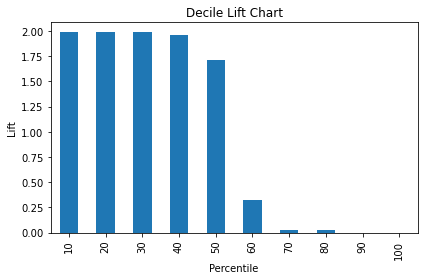

In [21]:
# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)

# run logistic regression model on training
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

TF-IDF 사용해 예측모델 적합

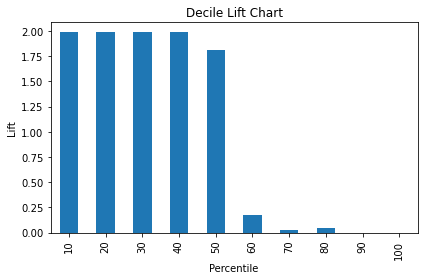

In [22]:
# split dataset into 60% training and 40% test set
Xtrain, Xtest, ytrain, ytest = train_test_split(tfidf, label, test_size=0.4, random_state=42)

# run logistic regression model on training
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

df = pd.DataFrame(data={'prob': [p[1] for p in logit_reg.predict_proba(Xtest)], 'actual': ytest})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

ax = liftChart(df.actual, labelBars=False)

plt.tight_layout()
plt.show()

In [23]:
# 리프트 차트 확인 결과 둘이 동일한 것으로 확인된다

# 20.3 온라인상에 게시된 안내광고의 분류

In [24]:
farm=pd.read_csv('farm-ads.csv')
farm=farm.drop(columns=['Unnamed: 0'])
farm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,page,found
1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,page,found
2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,NaN,NaN
3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,found,NaN
4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN


## a

#### 1

희소행렬 : 행렬의 값이 대부분 0인 경우

조밀행렬 : 의미있는 값인 원소로 채워져 있는 행렬

조밀행렬이라 볼 수 있다.

#### 2

In [26]:
farm_check=farm.loc[:,["10","11"]]
farm_check.head(5)

,10,11
0,page,found
1,page,found
2,NaN,NaN
3,found,NaN
4,NaN,NaN


In [27]:
farm_check.isnull().sum()

10    142
11    194
dtype: int64

In [28]:
print(farm_check["10"].unique())
print(farm_check["11"].unique())

['page' nan 'found' 'click' 'ad-fast' 'ad-com' 'title-click' 'ad-global'
 'ad-surgery' 'ad-advice' 'request' 'ad-guarantee' 'title-untitle'
 'ad-craftmanship']
['found' nan 'click' 'ad-market' 'ad-learn' 'untitle']


In [29]:
farm_check.dropna() #123r개의 행..?

,10,11
0,page,found
1,page,found
8,page,found
9,page,found
11,page,found
...,...,...
301,page,found
302,title-click,click
304,page,found
307,page,found


## b 

- 용어.문서 행렬

    여러 문서들을 확률적인 방식으로 분류하거나 레이블링하기 위한 텍스트 처리 방식 구분
    
    본질적으로 용어의 수가 너무 많아 효과적으로 모델 구축이 어려워 전처리 단계에 어휘 축소 포함
    

- 개념.문서 행렬 

    하나의 문서에서 의미 추출


## c

In [30]:
X = farm.drop(columns=["0"])
y = farm["0"]

In [33]:
# logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
# logit_reg.fit(X, y) 

# train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
# logit_reg.fit(train_X, train_y)

In [35]:
import numpy as np

In [36]:
## 전처리부터 다시

relate=farm[farm["0"]==1]
not_re=farm[farm["0"]==-1]

d_1=relate.drop(["0"],axis=1).values
d_2=not_re.drop(["0"],axis=1).values

d1_lst=np.concatenate(d_1.astype('str')).tolist()
d2_lst=np.concatenate(d_2.astype('str')).tolist()

corpus=d1_lst+d2_lst
label=len(d1_lst)*[1]+len(d2_lst)*[-1]

In [38]:
corpus=list(map(lambda s: s.replace('ad-','').corpus))

TypeError: map() must have at least two arguments.

## d

여러 개의 문서가 아니라 하나의 csv 파일에서 추출하는 것이기 때문

# 20.4 자동차 포스트의 클러스터링

## a

In [82]:
# Step 1: import and label records
corpus = []

with ZipFile('AutoAndElectronics.zip') as rawData:
    for info in rawData.infolist():
        if info.is_dir(): 
            continue
        
        corpus.append(rawData.read(info))

# Step 2: preprocessing (tokenization, stemming, and stopwords)
class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) 
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

## b

In [84]:
# Step 3: TF-IDF and latent semantic analysis
tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

# Extract 20 concepts using LSA ()
svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

## c

In [85]:
lsa_tfidf

array([[ 0.49177245,  0.51836922, -0.06423497, ..., -0.30579256,
        -0.17683934, -0.0271399 ],
       [ 0.90614039,  0.31432981, -0.08582079, ..., -0.01959973,
        -0.166048  ,  0.10595858],
       [ 0.72245454, -0.26424659, -0.05465159, ...,  0.19302494,
        -0.40106385,  0.0167892 ],
       ...,
       [ 0.38591147, -0.29395175, -0.41754214, ...,  0.11468496,
         0.00868001, -0.05528817],
       [ 0.75420205, -0.36220465, -0.01825273, ...,  0.01679675,
         0.04352074,  0.20526675],
       [ 0.23204027, -0.22232137, -0.110862  , ...,  0.1500051 ,
         0.01390595, -0.06163575]])

In [87]:
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

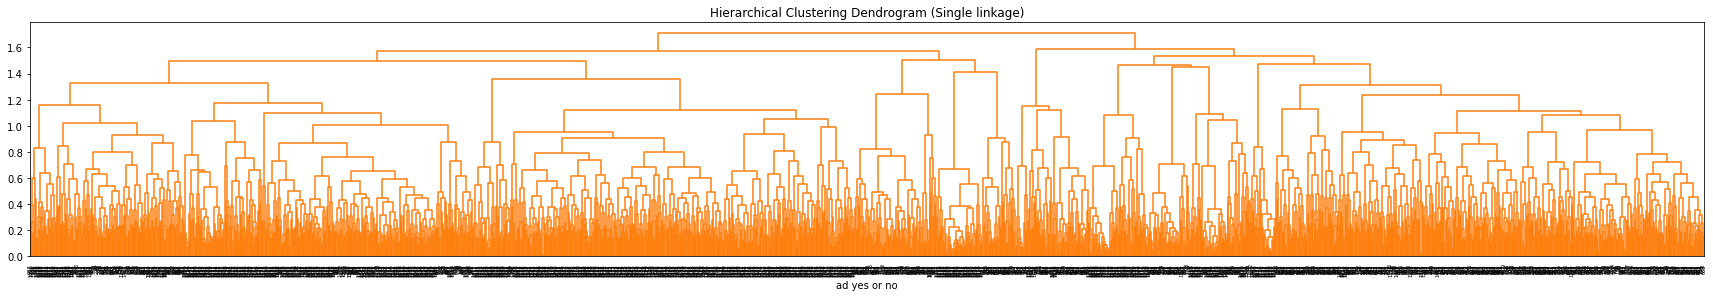

In [88]:

Z = linkage(lsa_tfidf, method='complete') # single / complete / average 
# complete 어느 정도 수준까지 같은 군집으로 볼 것인가

fig = plt.figure(figsize=(30, 5))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')  # 계층적 군집화를 실행하는 덴드로그램
plt.xlabel('ad yes or no')

dendrogram(Z, color_threshold=13) # 어느 정도 수준까지를 같은 군집으로 볼 것이냐를 판단하고 시각화하는 옵션
plt.axhline(y=13, color='black', linewidth=0.5, linestyle='dashed')
plt.show()